In [1]:
import pandas as pd

# Load the data
file_path = 'G:/Hangkai/Forest_edge_mapping_data/processed_country_data_with_area.csv'
country_data = pd.read_csv(file_path)

# Show the first few rows of the dataframe
country_data.head()


C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,country,stable,stable_per2000,stable_per2020,increase increase,increase increase percent,increase decrease,increase decrease percent,decrease increase,decrease increase percent,...,forest edge 2020,Unchanged Forest Area,Increased Forest Area 2020,Decreased Forest Area 2000,Total Forest Area 2000,Total Forest Area 2020,decrease rate,increase rate,Area Change,Edge Change
0,Indonesia,2.932940e+06,0.547937,0.585812,377782.3233,0.075456,1.695902e+06,0.338732,1.458103e+06,0.272406,...,5.006624e+06,1.474394e+06,48603.287350,89282.524090,1.563676e+06,1.522997e+06,0.057098,0.031913,-0.026015,-0.064653
1,Malaysia,2.921738e+05,0.423681,0.383578,63868.5001,0.083849,4.056648e+05,0.532573,2.826837e+05,0.409920,...,7.617070e+05,2.752761e+05,10048.507260,21272.398800,2.965485e+05,2.853246e+05,0.071733,0.035218,-0.037848,0.104551
2,Chile,1.523514e+06,0.791067,0.838995,138571.9005,0.076311,1.537945e+05,0.084694,2.339075e+05,0.121454,...,1.815880e+06,1.623306e+05,7197.778945,7392.213558,1.697228e+05,1.695284e+05,0.043555,0.042458,-0.001146,-0.057125
3,Bolivia,1.548777e+06,0.719363,0.738685,158406.1880,0.075551,3.894838e+05,0.185763,2.318779e+05,0.107701,...,2.096667e+06,5.571181e+05,6196.640349,39615.066220,5.967332e+05,5.633148e+05,0.066387,0.011000,-0.056002,-0.026158
4,Peru,9.658076e+05,0.769824,0.708248,107564.7010,0.078880,2.902844e+05,0.212872,1.654066e+05,0.131842,...,1.363657e+06,7.762328e+05,4311.612493,11962.057580,7.881949e+05,7.805444e+05,0.015177,0.005524,-0.009706,0.086941


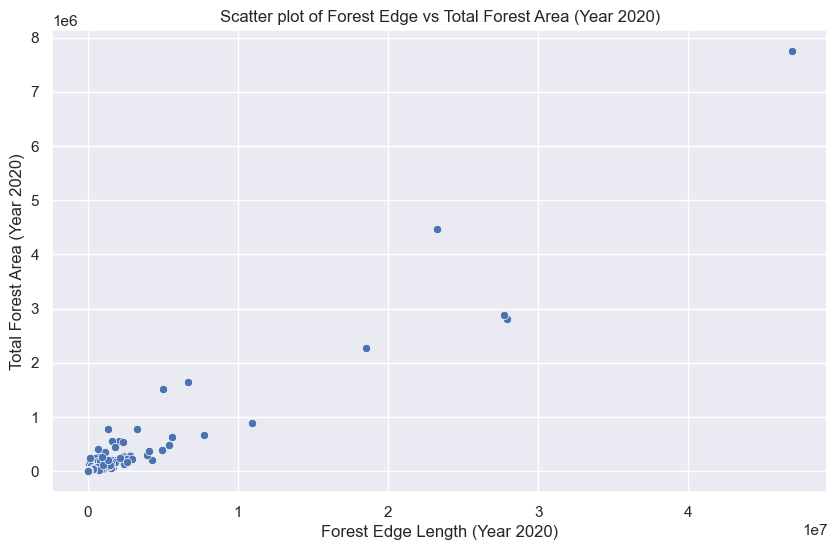

(0.9567061150930648, None)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(10, 6)})

# Scatter plot for 'Total Forest Area 2000' vs 'forest edge 2020'
ax = sns.scatterplot(x='forest edge 2020', y='Total Forest Area 2020', data=country_data)
ax.set_title('Scatter plot of Forest Edge vs Total Forest Area (Year 2020)')
ax.set_xlabel('Forest Edge Length (Year 2020)')
ax.set_ylabel('Total Forest Area (Year 2020)')

# Calculate the correlation coefficient
correlation_coefficient = country_data['forest edge 2020'].corr(country_data['Total Forest Area 2020'])

correlation_coefficient, plt.show()

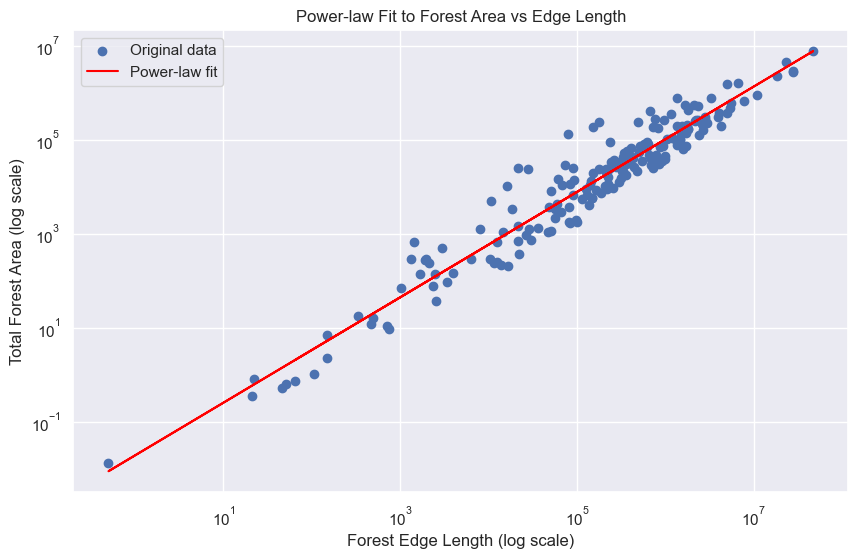

 slope: 1.1213624223643697 
 exp(intercept): 0.01935876491876294 
 r2: 0.9348283232823261 
 p_value: 7.841864109195363e-113


In [3]:
from scipy import stats

# Taking logarithms of the 'Total Forest Area 2000' and 'forest edge 2020' for power-law fitting
log_forest_area = np.log(country_data['Total Forest Area 2020'])
log_forest_edge = np.log(country_data['forest edge 2020'])

# Perform linear regression on the log-log transformed data
slope, intercept, r_value, p_value, std_err = stats.linregress(log_forest_edge, log_forest_area)

# The regression model in the log-log space
def log_log_regression_model(log_x):
    return intercept + slope * log_x

# Calculate the estimated forest area from the regression model
log_estimated_forest_area = log_log_regression_model(log_forest_edge)
estimated_forest_area = np.exp(log_estimated_forest_area)

# Plot the original data and the power-law regression fit
plt.figure(figsize=(10, 6))
plt.scatter(country_data['forest edge 2020'], country_data['Total Forest Area 2020'], label='Original data')
plt.plot(country_data['forest edge 2020'], estimated_forest_area, color='red', label='Power-law fit')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Forest Edge Length (log scale)')
plt.ylabel('Total Forest Area (log scale)')
plt.title('Power-law Fit to Forest Area vs Edge Length')
plt.legend()
plt.grid(True)
plt.show()

# Output the slope (b), intercept (log(a)), correlation coefficient (r), and p-value of the fit
print(' slope:',slope,'\n','exp(intercept):',np.exp(intercept), '\n','r2:',r_value*r_value, '\n','p_value:',p_value)

In [4]:
# Perform linear regression on the log-log transformed data
slope, intercept, r_value, p_value, std_err = stats.linregress(log_forest_edge, log_forest_area)

# Calculate the estimated forest area from the regression model
log_estimated_forest_area = intercept + slope * log_forest_edge
estimated_forest_area = np.exp(log_estimated_forest_area)

# Calculate the residuals
country_data['log_residuals2020'] = log_forest_area - log_estimated_forest_area

# Rank countries based on the absolute value of log-transformed residuals
country_data['log_fragmentation_rank2020'] = country_data['log_residuals2020'].abs().rank(method='min', ascending=True)

# Sort the dataframe based on the log-transformed rank
country_ranked_by_log_fragmentation = country_data.sort_values('log_fragmentation_rank2020')

# Display the countries with their respective log-transformed fragmentation rank and residuals
country_ranked_log_fragmentation_display = country_ranked_by_log_fragmentation[['country', 'log_residuals2020', 'log_fragmentation_rank2020']]
country_ranked_log_fragmentation_display.reset_index(drop=True, inplace=True)
country_ranked_log_fragmentation_display.head()  # Show the top entries

,country,log_residuals2020,log_fragmentation_rank2020
0,Russia,0.000191,1.0
1,South Sudan,0.000972,2.0
2,Senegal,0.005553,3.0
3,Montenegro,-0.015504,4.0
4,Cyprus,0.018327,5.0


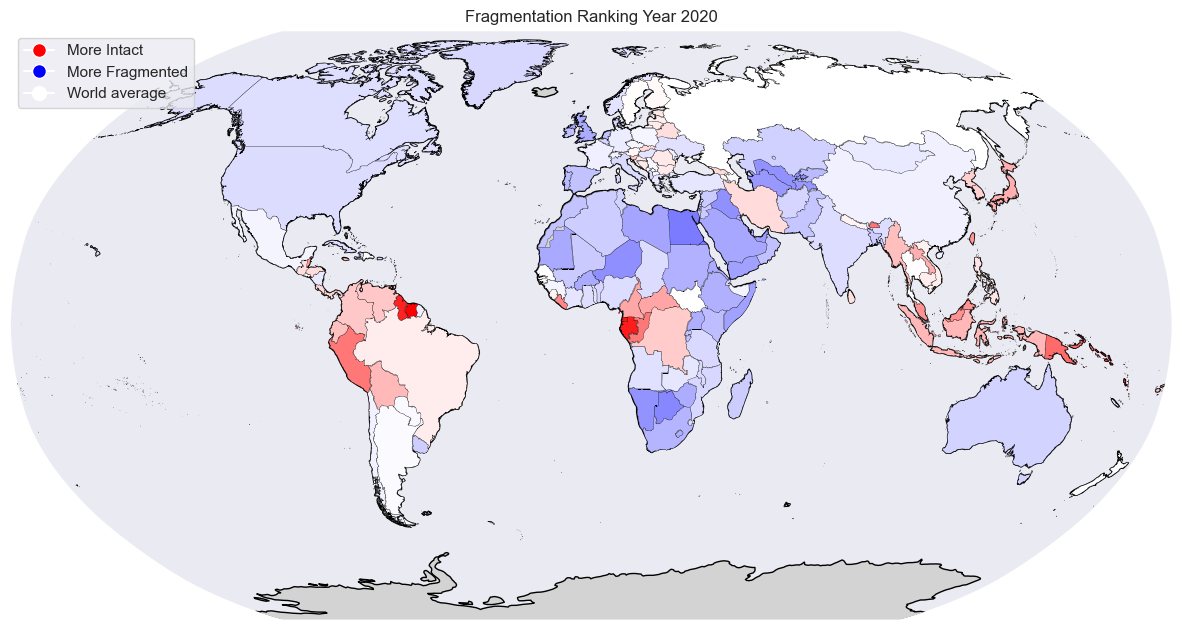

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy
import numpy as np
from matplotlib.lines import Line2D

# Function to get the deviation color
def get_color(deviation):
    max_deviation = max(abs(country_data['log_residuals2020']))
    color_intensity = np.abs(deviation) / max_deviation
    if deviation > 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation < 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'grey'

# Creating a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

# Reading the shapefile for countries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

# Plotting each country with the color representing the deviation
for country in shpreader.Reader(countries_shp).records():
    country_name = country.attributes['SOVEREIGNT']
    if country_name in country_data['country'].values:
        deviation = country_data[country_data['country'] == country_name]['log_residuals2020'].values[0]
        color = get_color(deviation)
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.2)

# Adding a title
plt.title('Fragmentation Ranking Year 2020')

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='More Intact'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='More Fragmented'),
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='World average')]

ax.legend(handles=legend_elements, loc='upper left')

plt.show()

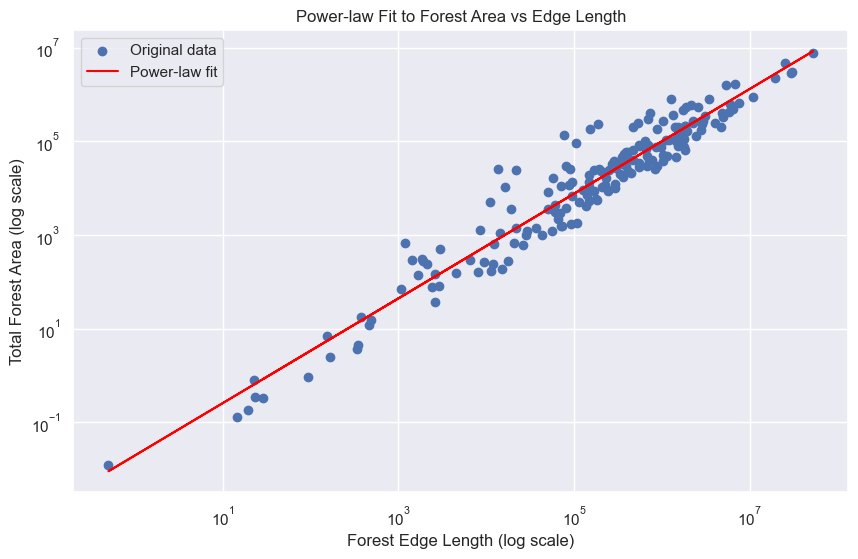

 slope: 1.117860008318125 
 exp(intercept): 0.019742894307061224 
 r2: 0.9312928153696466 
 p_value: 1.0975579970661434e-110


In [6]:
from scipy import stats

# Taking logarithms of the 'Total Forest Area 2000' and 'forest edge 2020' for power-law fitting
log_forest_area = np.log(country_data['Total Forest Area 2000'])
log_forest_edge = np.log(country_data['forest edge 2000'])

# Perform linear regression on the log-log transformed data
slope, intercept, r_value, p_value, std_err = stats.linregress(log_forest_edge, log_forest_area)

# The regression model in the log-log space
def log_log_regression_model(log_x):
    return intercept + slope * log_x

# Calculate the estimated forest area from the regression model
log_estimated_forest_area = log_log_regression_model(log_forest_edge)
estimated_forest_area = np.exp(log_estimated_forest_area)

# Plot the original data and the power-law regression fit
plt.figure(figsize=(10, 6))
plt.scatter(country_data['forest edge 2000'], country_data['Total Forest Area 2000'], label='Original data')
plt.plot(country_data['forest edge 2000'], estimated_forest_area, color='red', label='Power-law fit')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Forest Edge Length (log scale)')
plt.ylabel('Total Forest Area (log scale)')
plt.title('Power-law Fit to Forest Area vs Edge Length')
plt.legend()
plt.grid(True)
plt.show()

# Output the slope (b), intercept (log(a)), correlation coefficient (r), and p-value of the fit
print(' slope:',slope,'\n','exp(intercept):',np.exp(intercept), '\n','r2:',r_value*r_value, '\n','p_value:',p_value)

In [7]:
# Perform linear regression on the log-log transformed data
slope, intercept, r_value, p_value, std_err = stats.linregress(log_forest_edge, log_forest_area)

# Calculate the estimated forest area from the regression model
log_estimated_forest_area = intercept + slope * log_forest_edge
estimated_forest_area = np.exp(log_estimated_forest_area)

# Calculate the residuals
country_data['log_residuals2000'] = log_forest_area - log_estimated_forest_area

# Rank countries based on the absolute value of log-transformed residuals
country_data['log_fragmentation_rank2000'] = country_data['log_residuals2000'].abs().rank(method='min', ascending=True)

# Sort the dataframe based on the log-transformed rank
country_ranked_by_log_fragmentation = country_data.sort_values('log_fragmentation_rank2000')

# Display the countries with their respective log-transformed fragmentation rank and residuals
country_ranked_log_fragmentation_display = country_ranked_by_log_fragmentation[['country', 'log_residuals2000', 'log_fragmentation_rank2020']]
country_ranked_log_fragmentation_display.reset_index(drop=True, inplace=True)
country_ranked_log_fragmentation_display.head()  # Show the top entries

,country,log_residuals2000,log_fragmentation_rank2020
0,Guinea,-0.006520,25.0
1,Kosovo,-0.011479,8.0
2,Czechia,0.018240,18.0
3,Thailand,-0.021106,7.0
4,Dominican Republic,0.029448,13.0


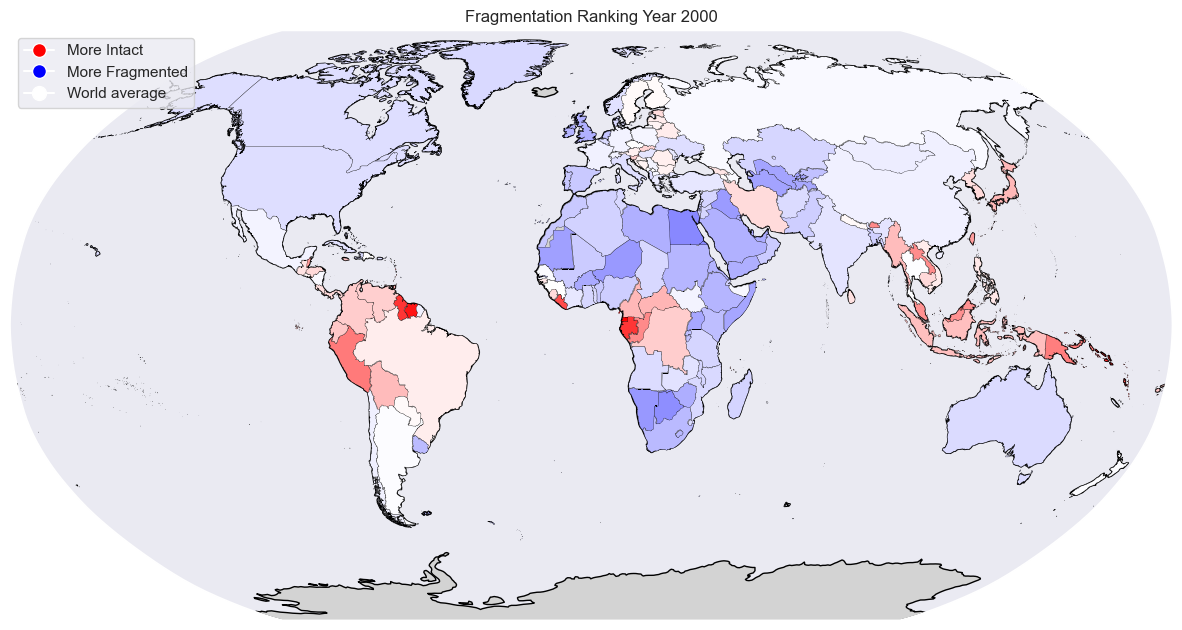

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy
import numpy as np
from matplotlib.lines import Line2D

# Function to get the deviation color
def get_color(deviation):
    max_deviation = max(abs(country_data['log_residuals2000']))
    color_intensity = np.abs(deviation) / max_deviation
    if deviation > 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation < 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'grey'

# Creating a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

# Reading the shapefile for countries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

# Plotting each country with the color representing the deviation
for country in shpreader.Reader(countries_shp).records():
    country_name = country.attributes['SOVEREIGNT']
    if country_name in country_data['country'].values:
        deviation = country_data[country_data['country'] == country_name]['log_residuals2000'].values[0]
        color = get_color(deviation)
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.2)

# Adding a title
plt.title('Fragmentation Ranking Year 2000')

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='More Intact'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='More Fragmented'),
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='World average')]

ax.legend(handles=legend_elements, loc='upper left')

plt.show()

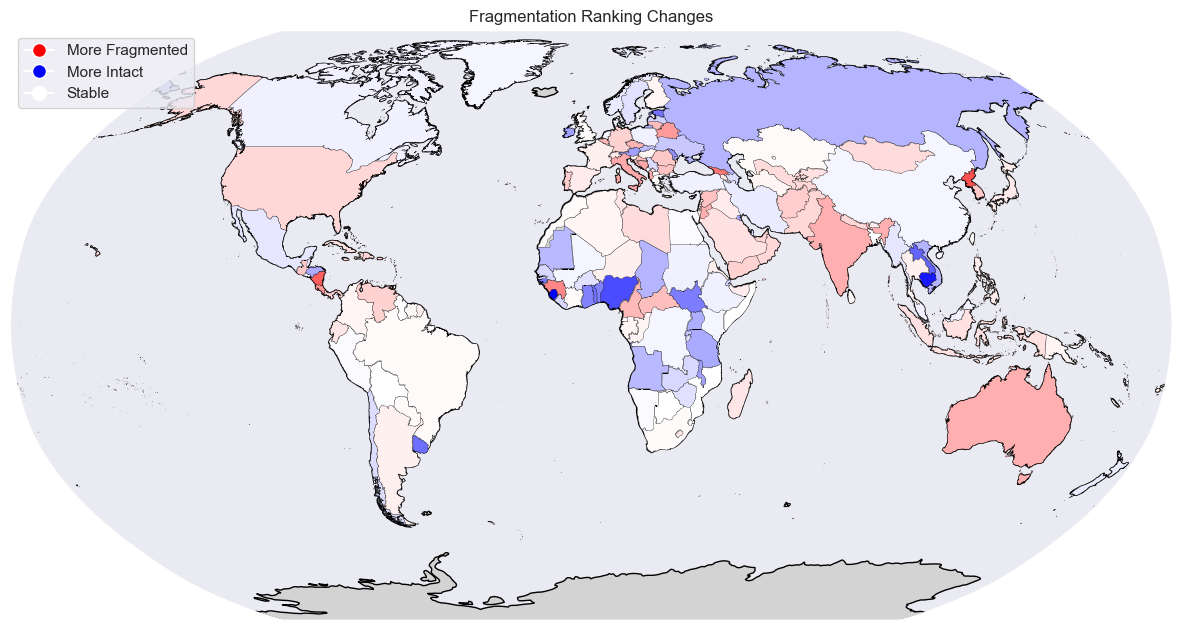

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy
import numpy as np
from matplotlib.lines import Line2D

# Function to get the deviation color
def get_color(deviation):
    max_deviation = max(abs(country_data['log_fragmentation_rank2020']-country_data['log_fragmentation_rank2000']))
    color_intensity = np.abs(deviation) / max_deviation
    if deviation > 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation < 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'white'

# Creating a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

# Reading the shapefile for countries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

# Plotting each country with the color representing the deviation
for country in shpreader.Reader(countries_shp).records():
    country_name = country.attributes['SOVEREIGNT']
    if country_name in country_data['country'].values:
        deviation = country_data[country_data['country'] == country_name]['log_fragmentation_rank2020'].values[0]-country_data[country_data['country'] == country_name]['log_fragmentation_rank2000'].values[0]
        color = get_color(deviation)
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.2)

# Adding a title
plt.title('Fragmentation Ranking Changes')

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='More Fragmented'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='More Intact'),
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='Stable')]

ax.legend(handles=legend_elements, loc='upper left')

plt.show()

In [13]:
print(country_data[country_data['country'] == 'Brazil']['log_fragmentation_rank2000'].values[0])

print(country_data[country_data['country'] == 'Canada']['log_fragmentation_rank2000'].values[0])
print(country_data[country_data['country'] == 'Canada']['log_fragmentation_rank2020'].values[0])

print(country_data[country_data['country'] == 'Canada']['log_residuals2020'].values[0])
print(country_data[country_data['country'] == 'Canada']['log_residuals2000'].values[0])

42.0
70.0
67.0
-0.40004083812539903
-0.44296977358413336


In [29]:
print(country_data[country_data['country'] == 'Brazil']['log_fragmentation_rank2000'].values[0])
print(country_data[country_data['country'] == 'Brazil']['log_residuals2000'].values[0])
print()
print(country_data[country_data['country'] == 'Laos']['log_fragmentation_rank2000'].values[0])
print(country_data[country_data['country'] == 'Laos']['log_fragmentation_rank2020'].values[0])

print(country_data[country_data['country'] == 'Laos']['log_residuals2020'].values[0])
print(country_data[country_data['country'] == 'Laos']['log_residuals2000'].values[0])

42.0
0.24048866105520972

175.0
144.0
0.9837050408390287
1.5660743965064778


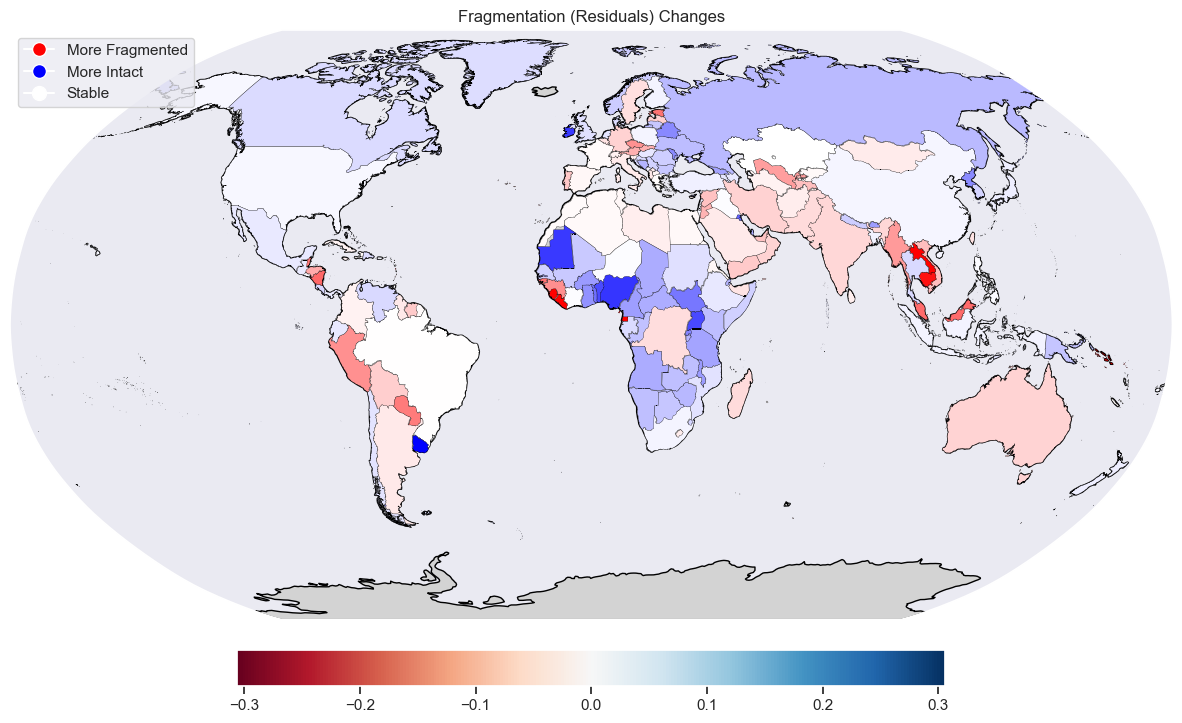

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy
import numpy as np
from matplotlib.lines import Line2D
import matplotlib as mpl

# Function to get the deviation color
def get_color(deviation):
    max_deviation = max((country_data['log_residuals2020']-country_data['log_residuals2000']))
    color_intensity = np.abs(deviation) / max_deviation
    if color_intensity > 1:
        color_intensity = 1
    
    if deviation < 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation > 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'white'

# Creating a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

# Reading the shapefile for countries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

# Plotting each country with the color representing the deviation
for country in shpreader.Reader(countries_shp).records():
    country_name = country.attributes['SOVEREIGNT']
    if country_name in country_data['country'].values:
        deviation = country_data[country_data['country'] == country_name]['log_residuals2020'].values[0]-country_data[country_data['country'] == country_name]['log_residuals2000'].values[0]
        color = get_color(deviation)
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.2)

# Adding a title
plt.title('Fragmentation (Residuals) Changes')

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='More Fragmented'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='More Intact'),
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='Stable')]

ax.legend(handles=legend_elements, loc='upper left')

# Set up a dummy ScalarMappable object for the color bar
max_deviation = max(country_data['log_residuals2020'] - country_data['log_residuals2000'])
norm = mpl.colors.Normalize(vmin=-max_deviation, vmax=max_deviation)
cmap = mpl.cm.RdBu
scalar_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = plt.colorbar(scalar_map, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)

plt.show()